<a href="https://colab.research.google.com/github/kingattai/vehicular-channel-estimation-dl/blob/main/TempleBiLSTM_LSTM_and_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.12.0

  Using cached keras-2.12.0-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.12.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.12.0 which is incompatible.


In [ ]:
!pip install keras==2.12.0

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NFRF ML/TempleBal.csv')
df

,Unnamed: 0,Velocity,Doppler shift,Distance,Average path Gain,Path Delays,CSI
0,0,51.199413,71.952692,3.487668,-7.535545,96.971634,1
1,1,114.578574,169.399720,0.801152,-16.514708,96.737418,0
2,2,90.519334,65.577744,2.216071,-14.628749,32.805970,1
3,3,75.852433,140.388965,6.316539,-12.558405,77.845406,0
4,4,27.162050,9.021801,0.379942,-18.882011,12.805361,1
...,...,...,...,...,...,...,...
18695,18695,53.759715,101.404219,8.148921,-2.435431,12.154524,0
18696,18696,104.810094,81.697661,3.722712,-7.924469,87.475364,1
18697,18697,46.393699,186.180256,1.624699,-8.871713,61.045876,0
18698,18698,38.530240,17.907019,1.705192,-9.906307,93.574051,1


In [ ]:
#Using DataFrame.drop() method.
df2=df.drop(df.columns[0], axis=1)

In [ ]:
X = df2.iloc[:, :5].values
Y = df2.iloc[:, 5:].values

In [ ]:
X

In [ ]:
Y

In [ ]:
# Data normalization using Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [ ]:
# Reshape data for RNN/Bi-LSTM (3D format required: [samples, timesteps, features])
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred_prob):
    y_pred = (y_pred_prob > 0.5).astype(int)  # Threshold at 0.5 for binary classification
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_prob)
    return accuracy, precision, recall, f1, roc_auc

In [ ]:
# Build and train a Bi-LSTM model
bi_lstm_model = Sequential([
    Bidirectional(LSTM(64, activation='relu'), input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    Dense(1, activation='sigmoid')  # Binary classification
])
bi_lstm_model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
bi_lstm_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
374/374 [==============================] - 7s 13ms/step - loss: 0.3960 - accuracy: 0.8017 - val_loss: 0.2929 - val_accuracy: 0.8686
Epoch 2/50
374/374 [==============================] - 3s 7ms/step - loss: 0.2829 - accuracy: 0.8742 - val_loss: 0.2574 - val_accuracy: 0.8837
Epoch 3/50
374/374 [==============================] - 3s 7ms/step - loss: 0.2245 - accuracy: 0.9058 - val_loss: 0.1567 - val_accuracy: 0.9345
Epoch 4/50
374/374 [==============================] - 3s 7ms/step - loss: 0.1789 - accuracy: 0.9271 - val_loss: 0.1564 - val_accuracy: 0.9358
Epoch 5/50
374/374 [==============================] - 4s 9ms/step - loss: 0.1466 - accuracy: 0.9385 - val_loss: 0.1888 - val_accuracy: 0.9258
Epoch 6/50
374/374 [==============================] - 4s 10ms/step - loss: 0.1383 - accuracy: 0.9459 - val_loss: 0.1281 - val_accuracy: 0.9542
Epoch 7/50
374/374 [==============================] - 5s 12ms/step - loss: 0.1236 - accuracy: 0.9524 - val_loss: 0.1842 - val_accuracy: 0.9422
Epo

In [ ]:
# Predict with Bi-LSTM
y_pred_bi_lstm_prob = bi_lstm_model.predict(X_test_rnn)
y_pred_bi_lstm = (y_pred_bi_lstm_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary labels

117/117 [==============================] - 1s 7ms/step


In [ ]:
print("\nBi-LSTM Performance Metrics:")
print("Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}, ROC-AUC: {:.4f}".format(*bi_lstm_metrics))



Bi-LSTM Performance Metrics:
Accuracy: 0.9762, Precision: 0.9607, Recall: 0.9937, F1-Score: 0.9769, ROC-AUC: 0.9974


In [ ]:
# Function to plot and print confusion matrix
def plot_and_print_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

Confusion Matrix:
[[1770   77]
 [  12 1881]]


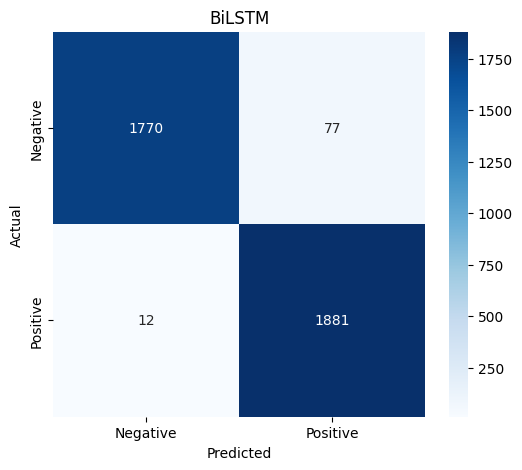

In [ ]:
# Print and plot confusion matrix
plot_and_print_confusion_matrix(y_test, y_pred_bi_lstm, "BiLSTM")

In [ ]:
# Build and train an RNN model
rnn_model = Sequential([
    SimpleRNN(64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])
rnn_model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
374/374 [==============================] - 7s 7ms/step - loss: 0.3257 - accuracy: 0.8557 - val_loss: 0.2581 - val_accuracy: 0.8840
Epoch 2/50
374/374 [==============================] - 2s 6ms/step - loss: 0.2019 - accuracy: 0.9169 - val_loss: 0.1549 - val_accuracy: 0.9435
Epoch 3/50
374/374 [==============================] - 2s 6ms/step - loss: 0.1747 - accuracy: 0.9303 - val_loss: 0.1400 - val_accuracy: 0.9495
Epoch 4/50
374/374 [==============================] - 2s 5ms/step - loss: 0.1528 - accuracy: 0.9398 - val_loss: 0.1328 - val_accuracy: 0.9515
Epoch 5/50
374/374 [==============================] - 2s 5ms/step - loss: 0.1307 - accuracy: 0.9519 - val_loss: 0.1267 - val_accuracy: 0.9472
Epoch 6/50
374/374 [==============================] - 2s 5ms/step - loss: 0.1330 - accuracy: 0.9523 - val_loss: 0.1705 - val_accuracy: 0.9342
Epoch 7/50
374/374 [==============================] - 2s 4ms/step - loss: 0.1137 - accuracy: 0.9578 - val_loss: 0.0843 - val_accuracy: 0.9696
Epoch 

In [ ]:
y_pred_rnn_prob = rnn_model.predict(X_test_rnn)
y_pred_rnn = (y_pred_rnn_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary labels

117/117 [==============================] - 1s 4ms/step


Confusion Matrix:
[[1829   18]
 [  38 1855]]


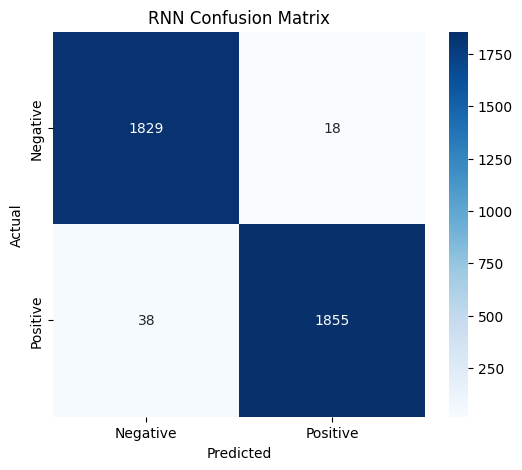

In [ ]:
# Print and plot confusion matrix for RNN
plot_and_print_confusion_matrix(y_test, y_pred_rnn, "RNN Confusion Matrix")

In [ ]:
# Print Performance Metrics
print("\nRNN Performance Metrics:")
print("Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}, ROC-AUC: {:.4f}".format(*rnn_metrics))

In [ ]:
#LSTM

In [ ]:
# Reshape the dataset for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Define the LSTM model
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

In [ ]:
# Compile the LSTM model
lstm_model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Predict on the test set
y_pred_lstm_prob = lstm_model.predict(X_test_lstm)

# Evaluate the LSTM model
lstm_metrics = evaluate_model(y_test, y_pred_lstm_prob)

# Print LSTM performance metrics
print("\nLSTM Performance Metrics:")
print("Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}, ROC-AUC: {:.4f}".format(*lstm_metrics))

Epoch 1/50
374/374 [==============================] - 4s 6ms/step - loss: 0.4155 - accuracy: 0.7891 - val_loss: 0.2969 - val_accuracy: 0.8697
Epoch 2/50
374/374 [==============================] - 3s 7ms/step - loss: 0.2937 - accuracy: 0.8676 - val_loss: 0.2564 - val_accuracy: 0.8854
Epoch 3/50
374/374 [==============================] - 3s 7ms/step - loss: 0.2440 - accuracy: 0.8920 - val_loss: 0.2060 - val_accuracy: 0.9184
Epoch 4/50
374/374 [==============================] - 2s 5ms/step - loss: 0.2113 - accuracy: 0.9095 - val_loss: 0.2004 - val_accuracy: 0.9218
Epoch 5/50
374/374 [==============================] - 2s 5ms/step - loss: 0.1702 - accuracy: 0.9293 - val_loss: 0.1728 - val_accuracy: 0.9258
Epoch 6/50
374/374 [==============================] - 2s 6ms/step - loss: 0.1535 - accuracy: 0.9357 - val_loss: 0.1386 - val_accuracy: 0.9402
Epoch 7/50
374/374 [==============================] - 2s 5ms/step - loss: 0.1366 - accuracy: 0.9455 - val_loss: 0.1467 - val_accuracy: 0.9382
Epoch 

In [ ]:
# Predict with LSTM
y_pred_lstm_prob = lstm_model.predict(X_test_lstm)
y_pred_lstm = (y_pred_lstm_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary labels


117/117 [==============================] - 1s 9ms/step


Confusion Matrix:
[[1805   42]
 [  30 1863]]


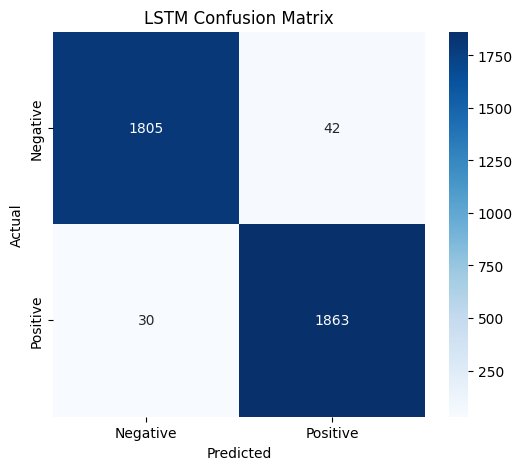

In [ ]:
# Print and plot confusion matrix for LSTM
plot_and_print_confusion_matrix(y_test, y_pred_lstm, "LSTM Confusion Matrix")